# 01. Data exploration and cleaning
## Notebook content:
    1. Importing visualisation libraries and data
    2. Basic descriptive analysis
         2.1. Data types
         2.2. Basic statistics
         2.3. Missing values
         2.4. Duplicates
    3. Visualising variants
        3.1. Qualititive variants with bar charts
        3.2. Quantitative variants with box plots
    4. Removing outliers
    5. Dropping columns
    6. Renaming columns

## 1. Importing visualisation libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
# Importing dataframe

path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'
sales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Superstore dataset.csv'), encoding='windows-1252')

In [3]:
# Visualising dataframe
sales.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


## 2. Basic descriptive analysis

### 2.1. Data types

In [63]:
# Visualising data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [64]:
# Changing data types

# Updating date columns to datetime
sales[['Order Date', 'Ship Date']] = sales[['Order Date', 'Ship Date']].astype('datetime64[ns]')

# Updating 'categorical' relevant columns that were saved as object
sales[['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']] = sales[['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']].astype('category')

# Updating 'object' relevant columns
sales[['Postal Code']] = sales[['Postal Code']].astype('object')

In [65]:
# Visualising data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [66]:
# Checking for mixed-type data

for col in sales.columns.tolist():
    weird = (sales[[col]].map(type) != sales[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (sales[weird]) > 0:
        print (col)

No mixed columns

### 2.2. Basic statistics

In [67]:
# Basic statistics to quantitative data

sales.describe().to_clipboard()
sales.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


The only variant that raises questions is the Sales. USD 22,638 seems quite high compared to the median of USD 54.49.This is possible and it might be linked to a corporate client, for example. It will be useful to visualise this in a box plot. 

In [68]:
# Basic statistics to dates
stats_dates = sales[['Order Date', 'Ship Date']].agg(['min', 'max'])
print(stats_dates)

    Order Date  Ship Date
min 2014-01-03 2014-01-07
max 2017-12-30 2018-01-05


In [69]:
# Basic statistics to categorical
stats_dates = sales[['Order Date', 'Ship Date']].agg(['min', 'max'])
print(stats_dates)

    Order Date  Ship Date
min 2014-01-03 2014-01-07
max 2017-12-30 2018-01-05


### 2.3. Missing values

In [70]:
# Finding out columns with missing values
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.4 Duplicates

In [71]:
# Seeing duplicate values

sales_dups = sales[sales.duplicated()]
sales_dups

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


## 3. Visualising data 

### 3.1 Qualitative variants (Bar Charts)

#### Ship Mode

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


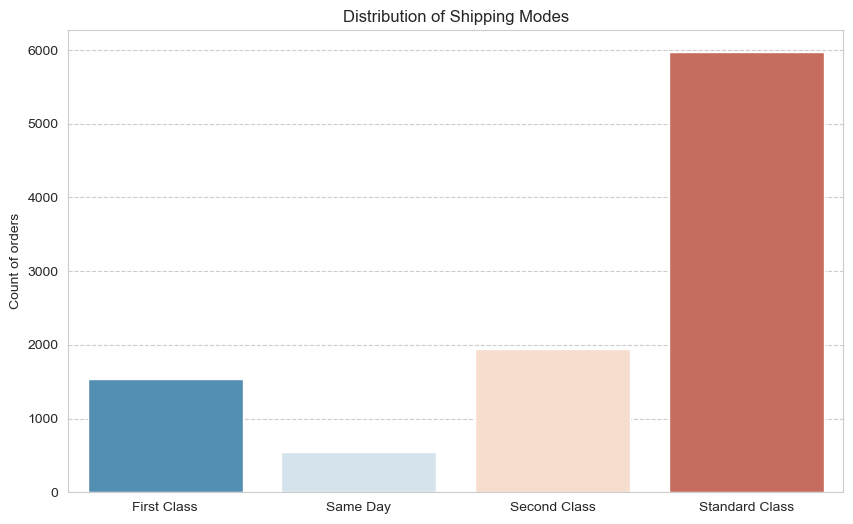

In [72]:
# Creating visualisation 
sns.set_palette('RdBu_r',4) #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Ship Mode', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('Count of orders') #removes label from y axis
plt.title('Distribution of Shipping Modes')

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_shipmode.png'))

#### Segment

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


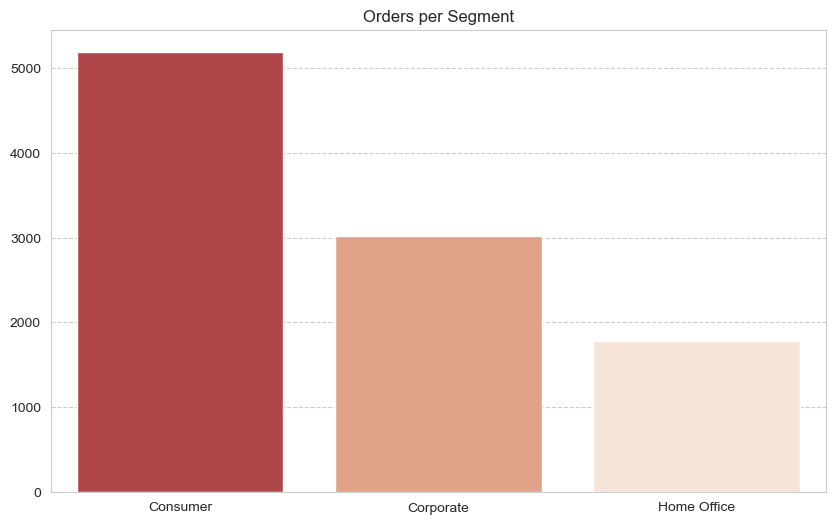

In [73]:
# Visualising Segment
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Segment', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Segment')
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_segment.png'))

#### Countries

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


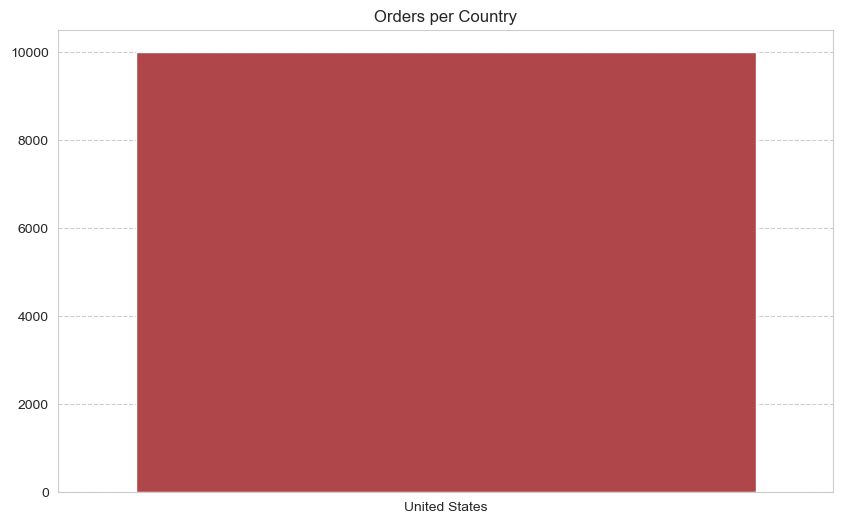

In [76]:
# Visualising Countries
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Country', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Country')
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_country.png'))

The 'country' column only has one value and can therefore be removed.

#### Regions

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


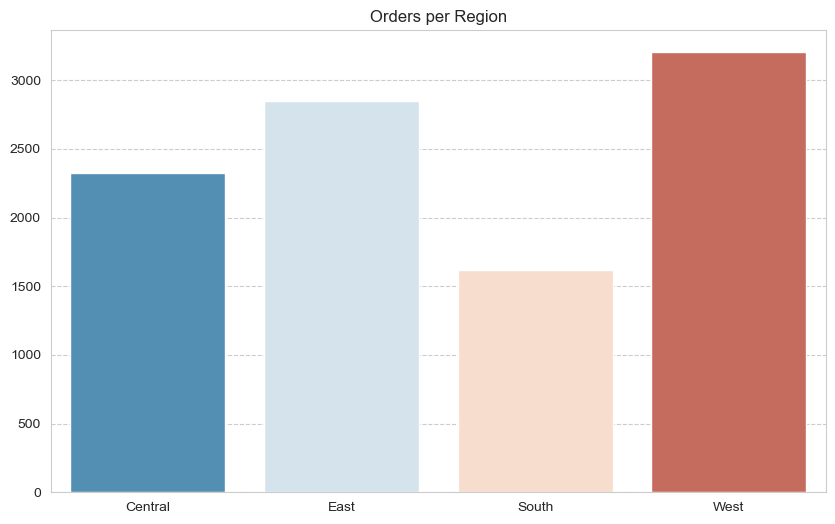

In [77]:
# Visualising Regions
sns.set_palette('RdBu_r',4) #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Region', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Region')
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_region.png'))

#### Category

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


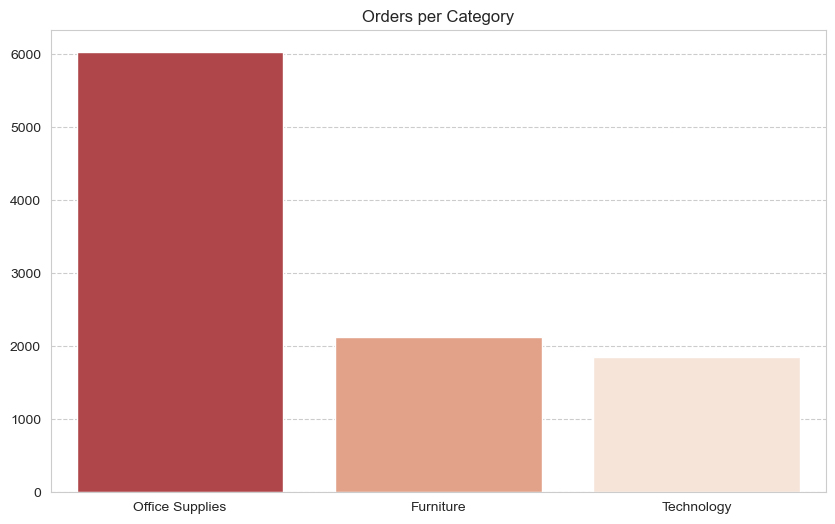

In [78]:
# Visualising Category
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Category', data=sales,
             order=sales['Category'].value_counts().index) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Category')
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_category.png'))

#### Sub-category

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


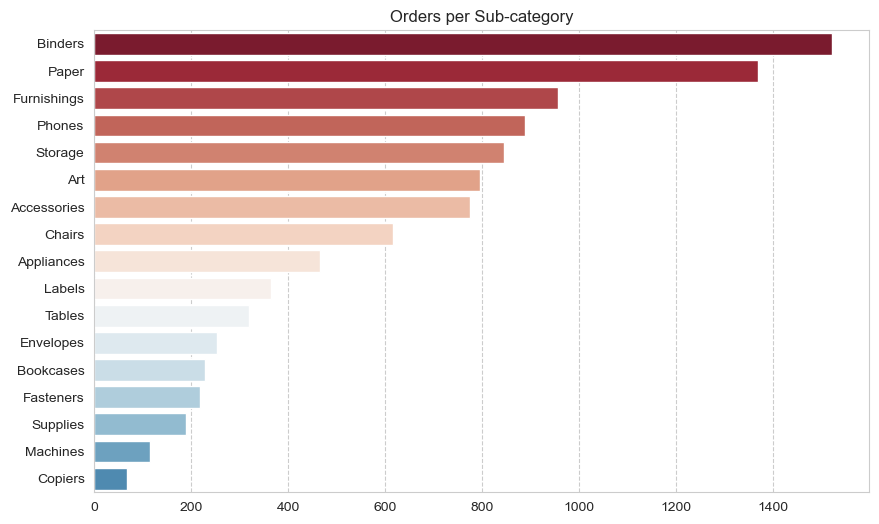

In [79]:
# Visualising Sub-category
sns.set_palette('RdBu',20) #sets the colour palette
sns.set_style('whitegrid', rc={'grid.linestyle': '--'})
plt.figure(figsize=(10, 6)) 
sns.countplot(y='Sub-Category', data=sales, #counts occurences in horizontal chart
             order=sales['Sub-Category'].value_counts().index) #orders per nr of counts
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Sub-category')
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Bar_count_subcategory.png'))

### 3.2. Quantitative variants (Box Plots)

#### Sales

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Sales')

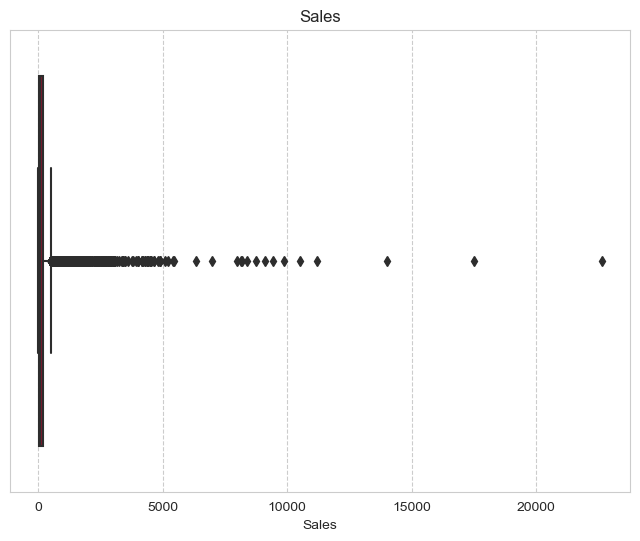

In [80]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales', data=sales)
plt.title('Sales')

- The outliers will impact the results of the analysis. Outliers to be removed based on 'Q3 + 1.5*IQR)

#### Discount

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


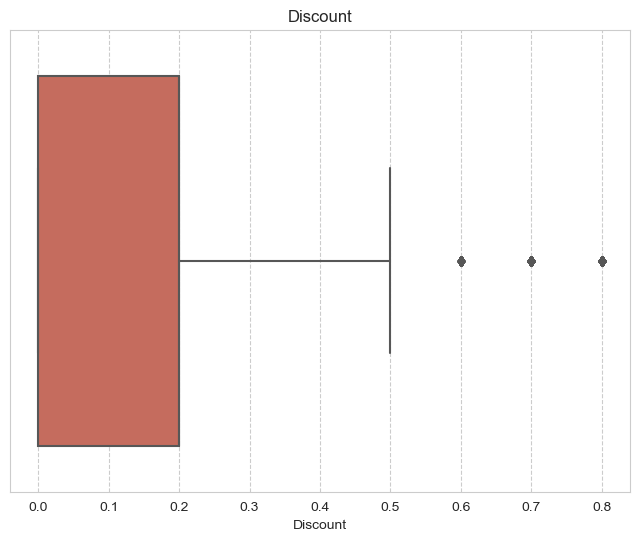

In [81]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.set_palette('RdBu',4) #sets the colour palette
sns.boxplot(x='Discount', data=sales)
plt.title('Discount')

# Saving image
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Boxplot_discount.png'), bbox_inches='tight')

- No values to be removed; Visualisation saved without removing outliers

#### Profit

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Profit')

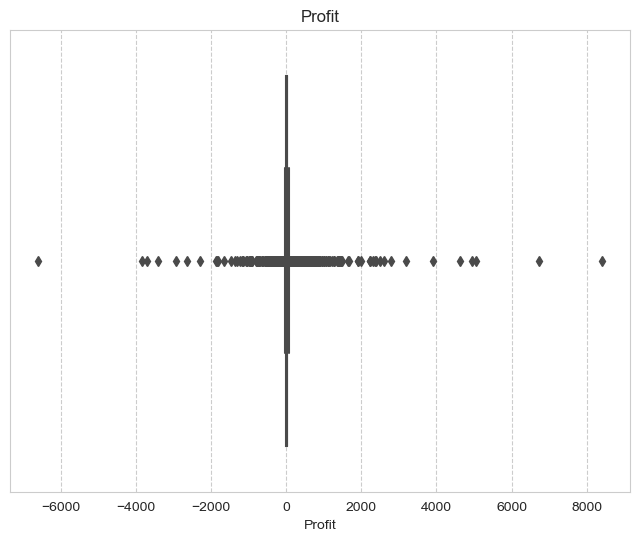

In [82]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.set_palette('RdBu') #sets the colour palette
sns.boxplot(x='Profit', data=sales)
plt.title('Profit')

- The outliers will impact the results of the analysis. Outliers to be removed based on Q1 - 1.5 * IQR / Q3 + 1.5 * IQR)

## 4. Removing outliers

#### Sales Variant

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


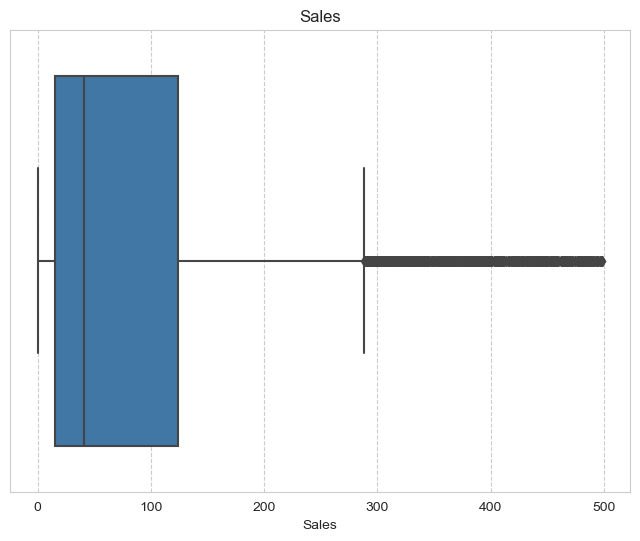

In [83]:
# Calculating the IQR
Q1 = sales['Sales'].quantile(0.25)
Q3 = sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining the threshold for identifying outliers
outlier_threshold = 1.5 

# Identifying and removing outliers
outliers = (sales['Sales'] < Q1 - outlier_threshold * IQR) | (sales['Sales'] > Q3 + outlier_threshold * IQR)
sales_no_outliers = sales[~outliers]

# Creating a box plot for Sales variant
plt.figure(figsize=(8, 6))
sns.set_palette('RdBu_r') #sets the colour palette
sns.boxplot(x='Sales', data=sales_no_outliers)
plt.title('Sales')

# Saving image
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Boxplot_sales_outliersremoved.png'), bbox_inches='tight')

In [84]:
# Confirming impact of outlier removal on dataframe
print (sales.shape, sales_no_outliers.shape)

(9994, 21) (8827, 21)


#### Profit Variant

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


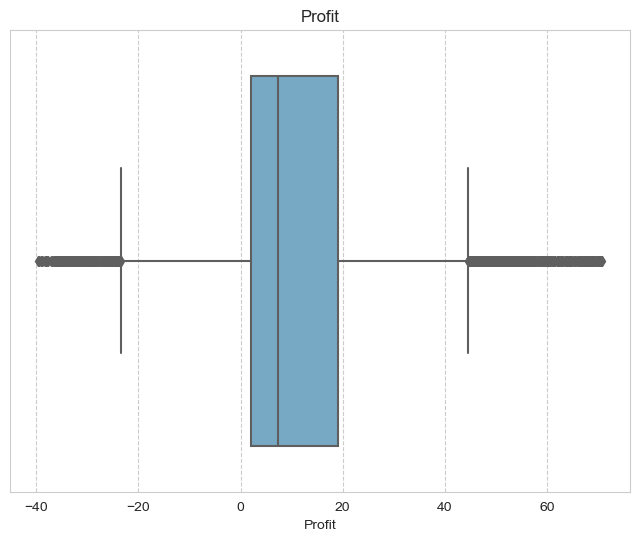

In [85]:
# Calculating the IQR
Q1 = sales['Profit'].quantile(0.25)
Q3 = sales['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Defining the threshold for identifying outliers
outlier_threshold = 1.5 

# Identifying and removing outliers
outliers = (sales['Profit'] < Q1 - outlier_threshold * IQR) | (sales['Profit'] > Q3 + outlier_threshold * IQR)
sales_no_outliers = sales[~outliers]

# Creating a box plot for Sales variant
plt.figure(figsize=(8, 6))
sns.set_palette('RdBu_r',3) #sets the colour palette
sns.boxplot(x='Profit', data=sales_no_outliers)
plt.title('Profit')

# Saving image
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Boxplot_profit_outliersremoved.png'), bbox_inches='tight')

In [86]:
# Confirming impact of outlier removal on dataframe
print (sales.shape, sales_no_outliers.shape)

(9994, 21) (8113, 21)


##### Note:
Noticing the high number of orders that incur in loss opens the interest for the total profit during the analysed period (03/01/2014 - 30/12/2017)

In [102]:
# Calculating the total profit
total_profit = round(sales_clean['Profit'].sum(), 2) #rounded to 2d.p.
print(f'Total Profit: {total_profit}')

Total Profit: 94143.95


##### Note:
Based on the above results, it would also be interesting to know the average profit per order

In [99]:
# Calculating the total profit
profit_per_order= round(total_profit / sales_clean['Profit'].count(),2) #rounded to 2d.p.
print(f'Profit per order: {profit_per_order}')

Profit per order: 11.6


## 5. Dropping columns

   - Name of clients is not required and can create data privacy issues - column to be removed
   - Country column only has one value (USA) - column to be removed

In [87]:
# Removing columns
sales_clean = sales_no_outliers.drop(columns = ['Customer Name', 'Country'])

In [88]:
# Confirming impact of outlier removal on dataframe
print (sales.shape, sales_no_outliers.shape, sales_clean.shape)

(9994, 21) (8113, 21) (8113, 19)


## 6. Renaming columns

- Throughout the analysis, it will be easier to code if columns don't have spaces in name, as this makes it easier to select column names - spaces to be removed

In [89]:
sales_clean.columns = sales_clean.columns.str.replace(' ', '_')
sales_clean.columns = sales_clean.columns.str.replace('-', '_') #for consistency, 'Sub-Category' updated to SubCategory
sales_clean

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932


In [90]:
# Exporting dataframe
sales_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.csv'))
sales_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

In [91]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8113 entries, 0 to 9992
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row_ID        8113 non-null   int64         
 1   Order_ID      8113 non-null   object        
 2   Order_Date    8113 non-null   datetime64[ns]
 3   Ship_Date     8113 non-null   datetime64[ns]
 4   Ship_Mode     8113 non-null   category      
 5   Customer_ID   8113 non-null   object        
 6   Segment       8113 non-null   category      
 7   City          8113 non-null   object        
 8   State         8113 non-null   object        
 9   Postal_Code   8113 non-null   object        
 10  Region        8113 non-null   category      
 11  Product_ID    8113 non-null   object        
 12  Category      8113 non-null   category      
 13  Sub_Category  8113 non-null   category      
 14  Product_Name  8113 non-null   object        
 15  Sales         8113 non-null   float64      